<a href="https://www.kaggle.com/code/amalhassan/2023-data-scientist-salary?scriptVersionId=162517451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-data-scientists-salary/ds_salaries.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/2023-data-scientists-salary/ds_salaries.csv")

In [3]:
dataset.info() #no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
dataset["employee_residence"].nunique() ##78 different countries
dataset["job_title"].nunique() ###93
#experience level is 4 same as employment type
dataset["company_location"].nunique() ##72 locations
dataset["company_size"].nunique() ###3, 'L', 'S', 'M', one hot encoding
dataset["salary_currency"].nunique() #20

20

In [5]:
dataset["remote_ratio"].unique() #100,   0,  50, should do one hot encoding

array([100,   0,  50])

the columns that might require one hot encoding/ label encoding
1. remote ration
2. company_size
3. experience level
4. employment_type

columns that don't require one hot encoding/label encoding
1. employee residence
2. job_title
3. company location

In [6]:
df=dataset.drop(["salary_currency", "salary" ], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB


In [8]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

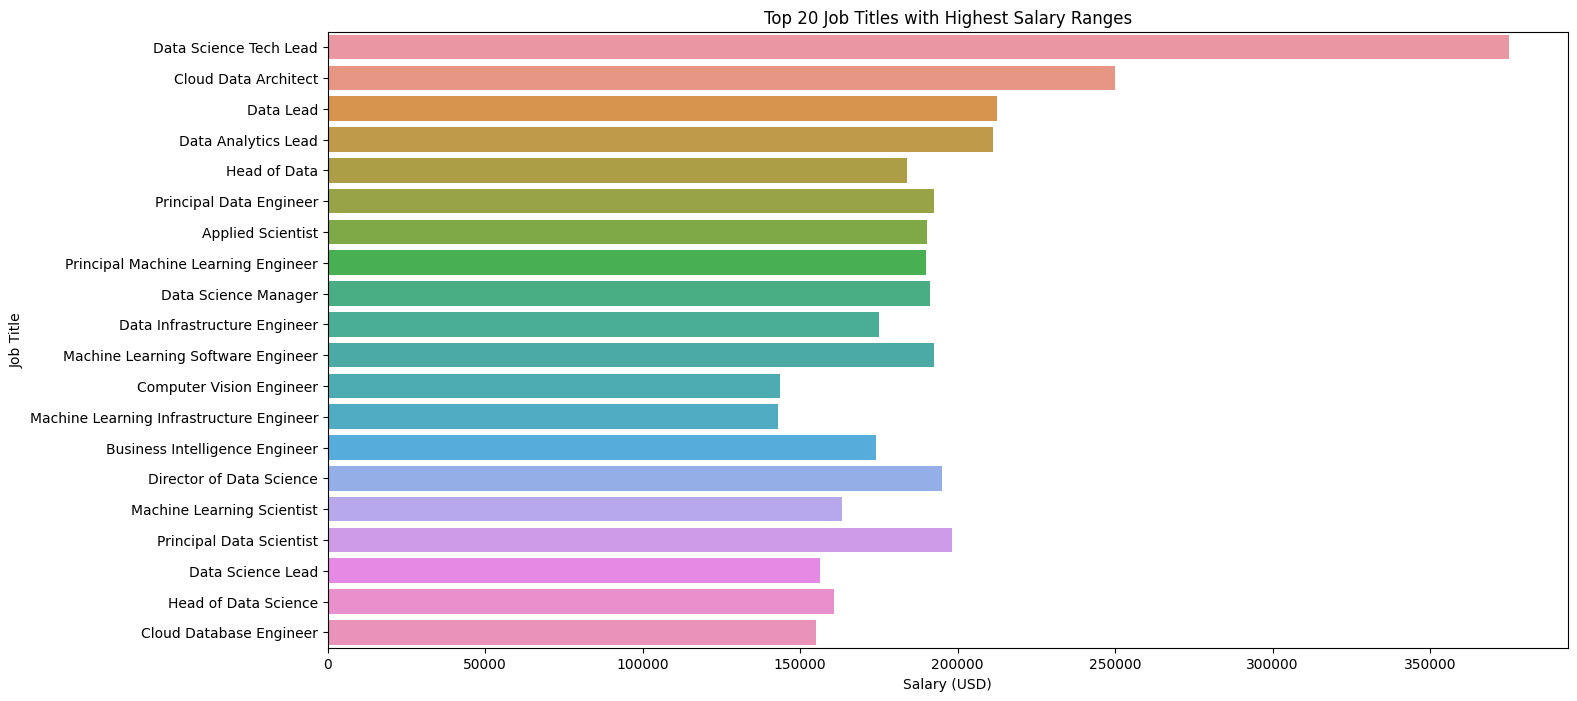

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Identify the top 10 or 20 job titles with the highest median salary
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(20).index

# Filter the dataset for the top job titles
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

# Create a bar chart to show the highest-paying job titles and their distribution
plt.figure(figsize=(16, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 20 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

In [11]:
df["job_title"].nunique()

93

In [12]:
data_scientist_keywords = {"ML", "Scientist", "Modeler", "AI", "Machine Learning", "Deep Learning", "Science"}
data_analyst_keywords = {"Analyst", "Analytics"}
data_engineer_keywords = {"Engineer", "Architect", "ETL", "BI"}

# Create a new column to store the categorized field
df['job_category'] = 'Others'

# Loop through the dataset and categorize job titles
for index, row in df.iterrows():
    job_title = row['job_title'].lower()  # Convert to lowercase for case-insensitive comparison
    
    if any(keyword.lower() in job_title for keyword in data_scientist_keywords):
        df.at[index, 'job_category'] = 'Data Scientist'
    elif any(keyword.lower() in job_title for keyword in data_analyst_keywords):
        df.at[index, 'job_category'] = 'Data Analyst'
    elif any(keyword.lower() in job_title for keyword in data_engineer_keywords):
        df.at[index, 'job_category'] = 'Data Engineer'


In [13]:
#checking what is in the others list
others_list = df[df["job_category"] == "Others"]["job_title"].unique()
print(others_list)

['Data Strategist' 'Head of Data' 'Data Manager' 'Data Specialist'
 'Autonomous Vehicle Technician' 'Data Lead' 'Manager Data Management'
 '3D Computer Vision Researcher' 'Data Management Specialist']


In [14]:
data_science_list = df[df["job_category"] == "Data Scientist"]["job_title"].nunique()
print(data_science_list)

37


In [15]:
data_analyst_list = df[df["job_category"] == "Data Analyst"]["job_title"].nunique()
print(data_analyst_list)

21


In [16]:
data_engineer_list = df[df["job_category"] == "Data Engineer"]["job_title"].nunique()
print(data_engineer_list)

26


In [17]:
# Calculate the percentage of people in each job field
percentage_per_category = df['job_category'].value_counts(normalize=True) * 100

# Print the result
print(percentage_per_category)


job_category
Data Scientist    42.023968
Data Engineer     34.380826
Data Analyst      21.864181
Others             1.731025
Name: proportion, dtype: float64


from what we see above, Data scientist holds about 42%, followed by data engineer and then Data analyst. 
what about interms of salary

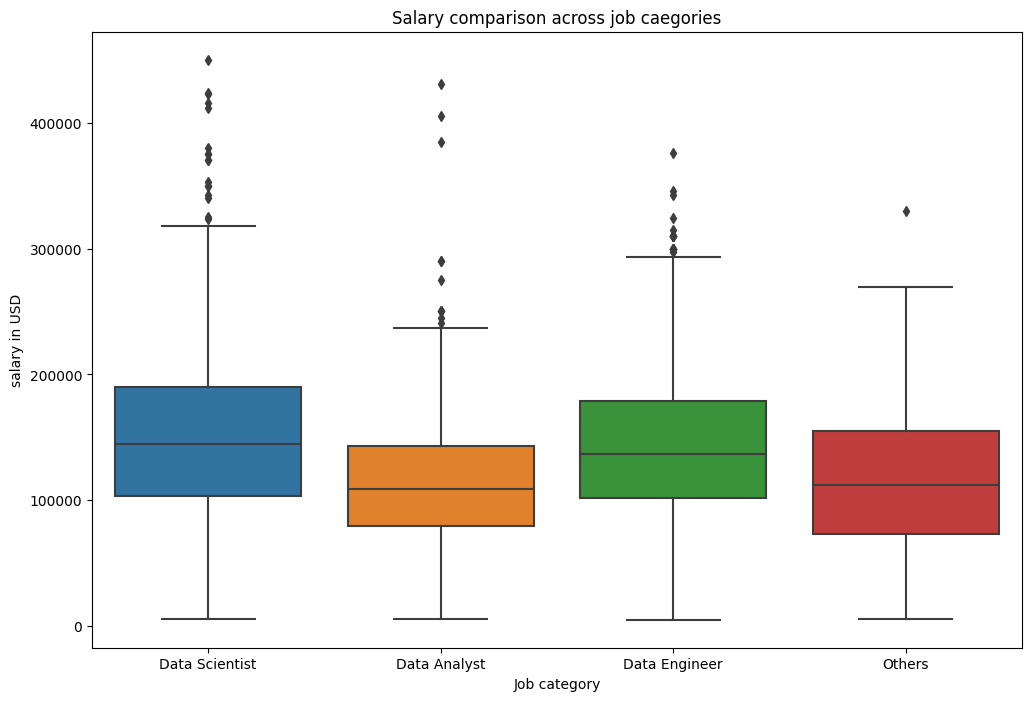

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(x="job_category", y="salary_in_usd", data=df)
plt.title("Salary comparison across job caegories")
plt.xlabel("Job category")
plt.ylabel("salary in USD")
plt.show()

from the boxplot above, we see that people in the data scientist field get paid more on average followed by data engineer then data analysts. others job category gets paid the least.


###this could be a bias because there are a lot of job titles in the datascience column and data engineer (##take note)

In [19]:
###this is to print jobs in rows
jobs = df["job_title"].tolist()

##now divide the jobs into fields
data_scientist = {"Ml", "Scientist","Scientist","Modeler", "AI", "Machine Learning", "Deep Learning"}
data_analyst = {"Analyst",""}
data_engineer = {"Engineer", "Architect", "ETL"}

##now loop through the dataset and group them into those fields


In [20]:
#identify the top 10 cities with the highest salary
top_cities = df.groupby("employee_residence")["salary_in_usd"].median().nlargest(20).index
top_cities

# Filter the dataset for the top job titles
df_employee = df[df['employee_residence'].isin(top_cities)]

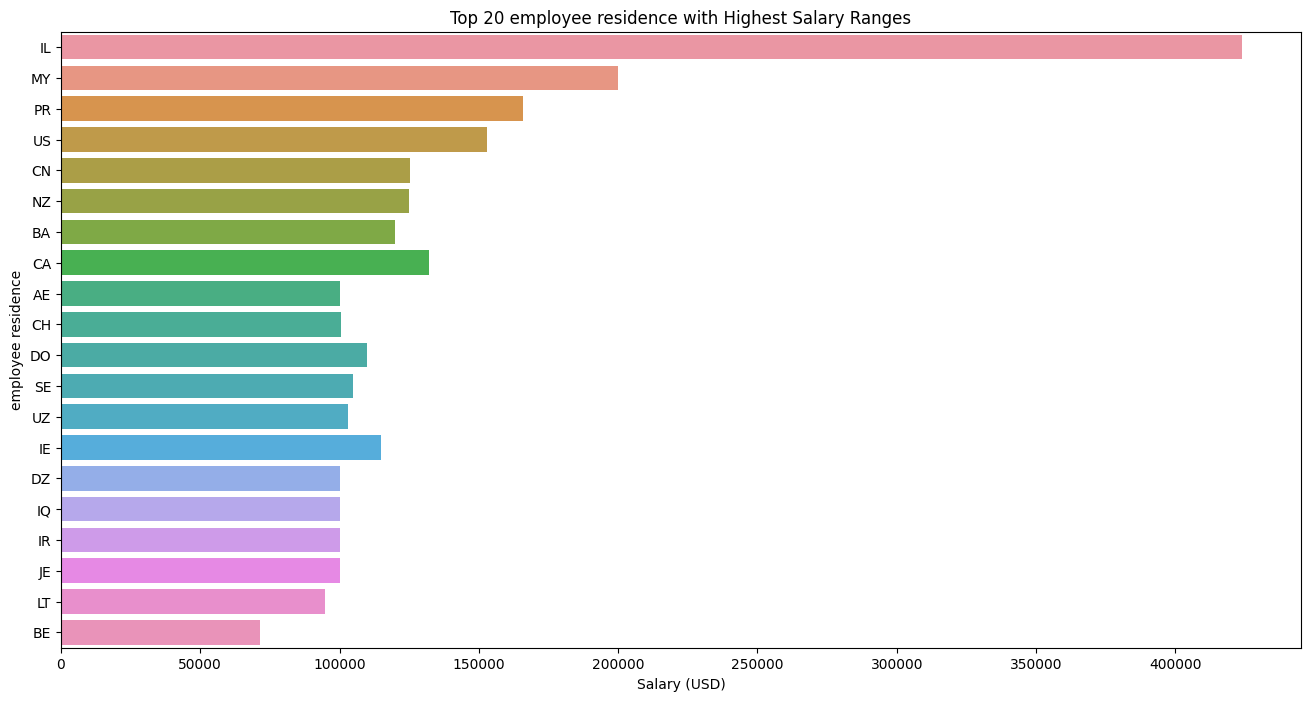

In [21]:
# Create a bar chart to show the highest-paying cties and their distribution
plt.figure(figsize=(16, 8))
sns.barplot(x='salary_in_usd', y='employee_residence', data=df_employee, errorbar=None, order=top_cities)
plt.title('Top 20 employee residence with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('employee residence')
plt.show()